In [67]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from cycler import cycler 
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
# plt.rcParams['axes.prop_cycle'] = cycler(color=['r', 'orange', 'forestgreen', 'b', 'mediumorchid', 'k'])
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,6)))

In [ ]:
#csv file containing name, nrs1 slope, nrs1 slope error, nrs2 slope, nrs2 slope error for each target
slopesdf = pd.read_csv('whitelcslopes.csv')

#convert slopes and slope errors to parts per million per house
slopeppm1 = slopesdf.slope_nrs1*1e6/24 
slopeerrppm1 = slopesdf.slope_err_nrs1*1e6/24 
slopeppm2 = slopesdf.slope_nrs2*1e6/24 
slopeerrppm2 = slopesdf.slope_err_nrs2*1e6/24 

#create and save new dataframe with the converted slopes
dct={'name':slopesdf.name, 'slope_nrs1':slopeppm1, 'slope_err_nrs1':slopeerrppm1, 'slope_nrs2':slopeppm2, 'slope_err_nrs2':slopeerrppm2}
ppmh = pd.DataFrame(dct)
ppmh.to_csv('wlc_slopes_ppmh.csv')
ppmh

,name,slope_nrs1,slope_err_nrs1,slope_nrs2,slope_err_nrs2
0,hatp1b,-81.380200,2.026698,39.418934,4.002165
1,hatp26b,-40.689884,3.825021,10.172399,5.020444
2,toi134b,-167.177322,2.107250,0.978401,3.284773
3,wasp63b,-10.169508,1.164614,9.854575,1.378668
4,wasp107b,-40.689892,2.356551,-10.171925,5.739524
5,wasp178b,-40.684629,2.917875,5.086276,3.544777


In [ ]:
params = pd.read_csv('params.csv')
alldata=pd.concat([params, ppmh.drop('name', axis=1)], axis=1)
prettynames = ['HAT-P-1 b', 'HAT-P-26 b', 'TOI-134 b', 'WASP-63 b', 'WASP-107 b', 'WASP-178 b']
alldata['prettynames'] = prettynames
alldata

,names,v_mag,j_mag,k_mag,Teff,R_p,groups,integrations,exposure_start,slope_nrs1,slope_err_nrs1,slope_nrs2,slope_err_nrs2,prettynames
0,hatp1b,9.8,9.156,8.9,5980,1.3190,19,1336,60632.568483,-81.380200,2.026698,39.418934,4.002165,HAT-P-1 b
1,hatp26b,11.8,10.080,9.6,5079,0.6300,48,481,60110.173536,-40.689884,3.825021,10.172399,5.020444,HAT-P-26 b
2,toi134b,11.0,7.941,7.1,3842,0.1454,4,3359,60113.791180,-167.177322,2.107250,0.978401,3.284773,TOI-134 b
3,wasp63b,11.2,9.818,9.4,5550,1.4100,33,1351,60706.136833,-10.169508,1.164614,9.854575,1.378668,WASP-63 b
4,wasp107b,11.6,9.378,8.6,4425,0.9400,6,4789,60487.394667,-40.689892,2.356551,-10.171925,5.739524,WASP-107 b
5,wasp178b,9.9,9.775,9.7,9360,1.8100,45,605,60010.334594,-40.684629,2.917875,5.086276,3.544777,WASP-178 b


Text(7.89, -15, 'NRS2')

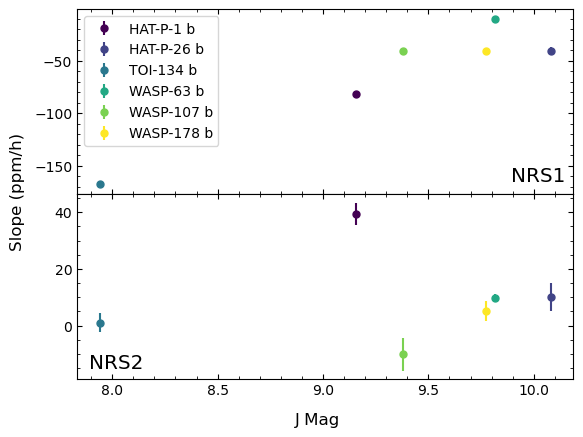

In [ ]:
# plot white light curve slope against J magnitude for each detector. color coding was meant to be in the same order as the 
# binned plots, but that didn't end up happening--might be worth doing that if these plots ever get used
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(hspace=0)

for i in range(len(alldata)):
    ax1.errorbar(alldata.j_mag[i], alldata.slope_nrs1[i], alldata.slope_err_nrs1[i], fmt='o', label=alldata.prettynames[i], ms=5)
    ax2.errorbar(alldata.j_mag[i], alldata.slope_nrs2[i], alldata.slope_err_nrs2[i], fmt='o', ms=5)

ax1.legend()
fig.supxlabel('J Mag')
fig.supylabel('Slope (ppm/h)')
ax1.text(9.89,-165,'NRS1', size='x-large')
ax2.text(7.89,-15,'NRS2', size='x-large')

Text(350, -15, 'NRS2')

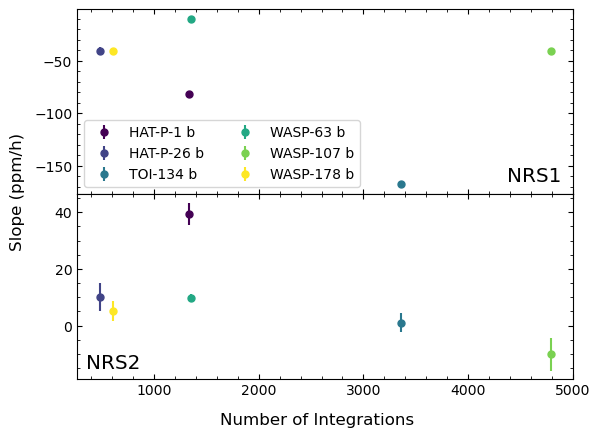

In [ ]:
# plot white light curve slope against number of integrations for each detector

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(hspace=0)

for i in range(len(alldata)):
    ax1.errorbar(alldata.integrations[i], alldata.slope_nrs1[i], alldata.slope_err_nrs1[i], fmt='o', label=alldata.prettynames[i], ms=5)
    ax2.errorbar(alldata.integrations[i], alldata.slope_nrs2[i], alldata.slope_err_nrs2[i], fmt='o', ms=5)

ax1.legend(ncols=2)
fig.supxlabel('Number of Integrations')
fig.supylabel('Slope (ppm/h)')
ax1.text(4375,-165,'NRS1', size='x-large')
ax2.text(350,-15,'NRS2', size='x-large')

Text(2.6, 38, 'NRS2')

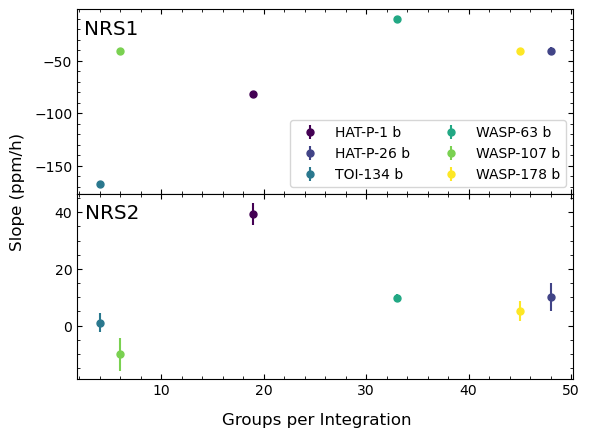

In [ ]:
# plot white light curve slope against groups per integration for each detector

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(hspace=0)

for i in range(len(alldata)):
    ax1.errorbar(alldata.groups[i], alldata.slope_nrs1[i], alldata.slope_err_nrs1[i], fmt='o', label=alldata.prettynames[i], ms=5)
    ax2.errorbar(alldata.groups[i], alldata.slope_nrs2[i], alldata.slope_err_nrs2[i], fmt='o', ms=5)

ax1.legend(ncols=2)
fig.supxlabel('Groups per Integration')
fig.supylabel('Slope (ppm/h)')
ax1.text(2.5,-25,'NRS1', size='x-large')
ax2.text(2.6,38,'NRS2', size='x-large')